# Student Mental Health

## Install the Libraries

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8feaae3d9c10737e687ad368e1d76319914a4406f69733cbe3735995ddf84eaa
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.0 MB/s 


In [ ]:
!pip install pmaw pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 6.0 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 


## Import the Libraries

In [ ]:
from google.colab import files
import pandas as pd
from datetime import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import time
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pmaw import PushshiftAPI

## Load the data


In [ ]:
file = files.upload()

### Mental Health Posts

In [ ]:
mentalhealth_df = pd.read_json("MentalHealthDataset.json")

In [ ]:
print(len(mentalhealth_df))
mentalhealth_df.head()

2033


,id,author,author_flair_text,created_utc,num_comments,post,preprocessed_post
0,abd016,PolysciStudent,None,1546301745,18,Happy New Years. I wish you all a happy new ye...,"[happy, new, year, wish, happy, new, year, lea..."
1,abg60z,orange_chilli,None,1546327059,1,This is how lonely i am.. Happy new year.,"[lonely, happy, new, year]"
2,abg611,orange_chilli,None,1546327060,33,This is how lonely i am.. Happy new year.,"[lonely, happy, new, year]"
3,acbkhk,starrynights123,None,1546557366,9,How to deal with one sided friendships?. i am ...,"[deal, one, side, friendship, type, person, pu..."
4,acf0h6,drdongun,Oof,1546580258,11,Escape reality. Sometimes I just wanna say f t...,"[escape, reality, sometimes, wan_na, say, fly,..."


### Mental Health Comments

### Reddit Posts

In [ ]:
reddit_df = pd.read_json("PreprocessedPosts.json")

In [ ]:
print(len(reddit_df))
reddit_df.head()

56261


,id,author,author_flair_text,created_utc,num_comments,post,preprocessed_post
0,abcz5u,lit12345yxz,None,1546301594,1,PharmD Application. I was hoping anything that...,"[pharmd, application, hop, anything, applied, ..."
1,abd016,PolysciStudent,None,1546301745,18,Happy New Years. I wish you all a happy new ye...,"[happy, new, year, wish, happy, new, year, lea..."
2,abdm2o,doyouevenschool,None,1546306023,9,New Year’s Resolution.... Learn to accept that...,"[new, year, resolution, learn, accept, polysci..."
3,abev8w,ilovedogs1017,None,1546316423,2,Winter Term Midterms. Does anyone know if midt...,"[winter, term, midterm, anyone, know, midterm,..."
4,abewo8,delciopp,MEC E Year 2,1546316766,11,What's your New Years resolution?.,"[new, year, resolution]"


## User Activity from 2019 to 2022

In [ ]:
for i in range(len(mentalhealth_df)):
   time = datetime.fromtimestamp(int(mentalhealth_df.loc[i, 'created_utc']), pytz.timezone('US/Mountain')).strftime('%Y-%m-%d %H:%M:%S')
   mentalhealth_df.loc[i, 'created_utc'] = time

In [ ]:
mentalhealth_df.head()

,id,author,author_flair_text,created_utc,num_comments,post,preprocessed_post
0,abd016,PolysciStudent,None,2018-12-31 17:15:45,18,Happy New Years. I wish you all a happy new ye...,"[happy, new, year, wish, happy, new, year, lea..."
1,abg60z,orange_chilli,None,2019-01-01 00:17:39,1,This is how lonely i am.. Happy new year.,"[lonely, happy, new, year]"
2,abg611,orange_chilli,None,2019-01-01 00:17:40,33,This is how lonely i am.. Happy new year.,"[lonely, happy, new, year]"
3,acbkhk,starrynights123,None,2019-01-03 16:16:06,9,How to deal with one sided friendships?. i am ...,"[deal, one, side, friendship, type, person, pu..."
4,acf0h6,drdongun,Oof,2019-01-03 22:37:38,11,Escape reality. Sometimes I just wanna say f t...,"[escape, reality, sometimes, wan_na, say, fly,..."


In [ ]:
for i in range(len(reddit_df)):
   time = datetime.fromtimestamp(int(reddit_df.loc[i, 'created_utc']), pytz.timezone('US/Mountain')).strftime('%Y-%m-%d %H:%M:%S')
   reddit_df.loc[i, 'created_utc'] = time

In [ ]:
print(reddit_df.loc[:, 'created_utc'])

0        2018-12-31 17:13:14
1        2018-12-31 17:15:45
2        2018-12-31 18:27:03
3        2018-12-31 21:20:23
4        2018-12-31 21:26:06
                ...         
56256    2022-06-30 11:14:13
56257    2022-06-30 11:29:57
56258    2022-06-30 13:46:34
56259    2022-06-30 15:24:57
56260    2022-06-30 16:35:56
Name: created_utc, Length: 56261, dtype: object


### Mental Health Dataset

In [ ]:
data1 = mentalhealth_df.set_index(pd.DatetimeIndex(mentalhealth_df['created_utc'])).drop('created_utc', axis=1)

In [ ]:
print(data1)

                         id                author  \
created_utc                                         
2018-12-31 17:15:45  abd016        PolysciStudent   
2019-01-01 00:17:39  abg60z         orange_chilli   
2019-01-01 00:17:40  abg611         orange_chilli   
2019-01-03 16:16:06  acbkhk       starrynights123   
2019-01-03 22:37:38  acf0h6              drdongun   
...                     ...                   ...   
2022-06-17 23:58:54  vezo7m  Otherwise-Attempt-45   
2022-06-19 19:06:28  vg9c9w  Sea-Introduction-500   
2022-06-23 10:29:40  vj0xby            oishiinyaa   
2022-06-24 21:06:58  vk5fi9              Brahehat   
2022-06-26 21:57:14  vlmepo                  11px   

                                                   author_flair_text  \
created_utc                                                            
2018-12-31 17:15:45                                             None   
2019-01-01 00:17:39                                             None   
2019-01-01 00:17:40   

In [ ]:
mental_health_week = data1.resample('W').post.count()

In [ ]:
print(mental_health_week)

created_utc
2019-01-06     7
2019-01-13     8
2019-01-20     4
2019-01-27     8
2019-02-03    11
              ..
2022-05-29     6
2022-06-05     3
2022-06-12     7
2022-06-19     7
2022-06-26     3
Freq: W-SUN, Name: post, Length: 182, dtype: int64


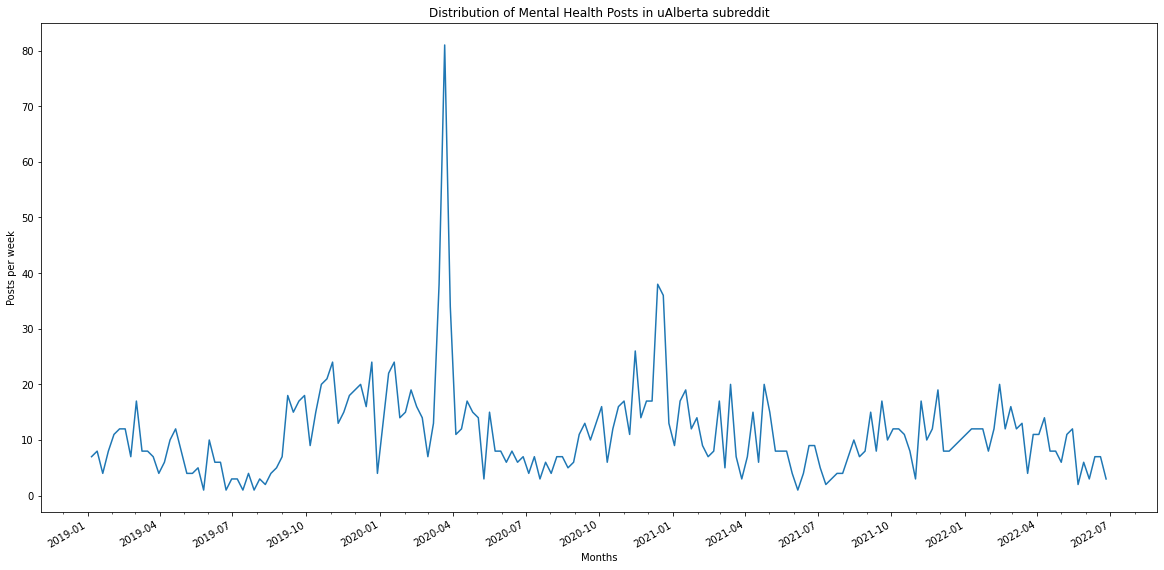

In [ ]:
fig1, ax = plt.subplots()
ax.plot(mental_health_week.index, mental_health_week.values)
plt.xlabel("Months")
plt.ylabel("Posts per week")
plt.title("Distribution of Mental Health Posts in uAlberta subreddit")
months = mdates.MonthLocator(bymonthday=1, interval=3) 
months2 = mdates.MonthLocator(bymonthday=1, interval=1) 
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(months2)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.rcParams["figure.figsize"] = (20,10)
fig1.autofmt_xdate()

### Reddit Dataset

In [ ]:
data2 = reddit_df.set_index(pd.DatetimeIndex(reddit_df['created_utc'])).drop('created_utc', axis=1)

In [ ]:
reddit_week = data2.resample('W').post.count()

In [ ]:
print(reddit_week)

created_utc
2019-01-06    237
2019-01-13    322
2019-01-20    222
2019-01-27    161
2019-02-03    296
             ... 
2022-06-05    190
2022-06-12    173
2022-06-19    195
2022-06-26    190
2022-07-03     74
Freq: W-SUN, Name: post, Length: 183, dtype: int64


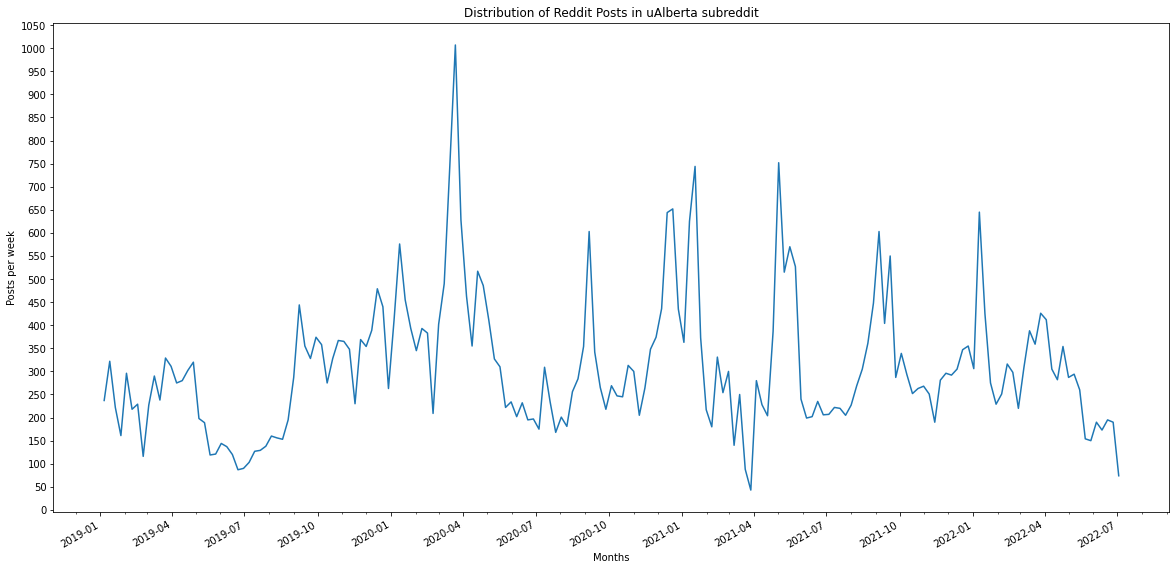

In [ ]:
fig2, ax = plt.subplots()
ax.plot(reddit_week.index, reddit_week.values)
plt.xlabel("Months")
plt.ylabel("Posts per week")
plt.title("Distribution of Reddit Posts in uAlberta subreddit")
months = mdates.MonthLocator(bymonthday=1, interval=3) 
months2 = mdates.MonthLocator(bymonthday=1, interval=1) 
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(months2)
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
plt.rcParams["figure.figsize"] = (15,10)
fig2.autofmt_xdate()

## Number of mental health posts posted at an X time of the day

In [ ]:
data3 = np.zeros([1,25]) # 24 columns for the 24 hours of the day + 1 to complete the loop

In [ ]:
post_count = 0
total_posts = len(mentalhealth_df)
for row in range(total_posts):
  post_count += 1 
  epoch = int(mentalhealth_df.loc[row, 'created_utc'])
  hour_posted = time.gmtime(epoch).tm_hour

  if hour_posted >= 7:
    data3[0][hour_posted - 7] += 1

  else:
    data3[0][24+ (hour_posted -7)] +=1

In [ ]:
print(post_count)

2033


In [ ]:
hours = []
for hour in range(24):
  hours.append(hour)

In [ ]:
angles = np.linspace(0, 2*np.pi, len(hours), endpoint=False)

In [ ]:
print(data3)

[[ 64.  48.  30.  20.  16.  13.  22.  34.  58.  89. 104. 131. 106.  96.
  126. 124. 116. 118. 119. 110. 118. 129. 136. 106.   0.]]


In [ ]:
data3[0][24] = data3[0][0]

In [ ]:
angles = np.append(angles, angles[0])
hours.append(hours[0])

In [ ]:
data3 = np.flip(data3, axis=1)
hours.reverse()

In [ ]:
print(data3)

[[ 64. 106. 136. 129. 118. 110. 119. 118. 116. 124. 126.  96. 106. 131.
  104.  89.  58.  34.  22.  13.  16.  20.  30.  48.  64.]]


In [ ]:
print(angles)

[0.         0.26179939 0.52359878 0.78539816 1.04719755 1.30899694
 1.57079633 1.83259571 2.0943951  2.35619449 2.61799388 2.87979327
 3.14159265 3.40339204 3.66519143 3.92699082 4.1887902  4.45058959
 4.71238898 4.97418837 5.23598776 5.49778714 5.75958653 6.02138592
 0.        ]


/usr/local/lib/python3.7/dist-packages/matplotlib/projections/polar.py:729: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.array([[0.0, 0.0], [1.0, 1.0]], np.float),


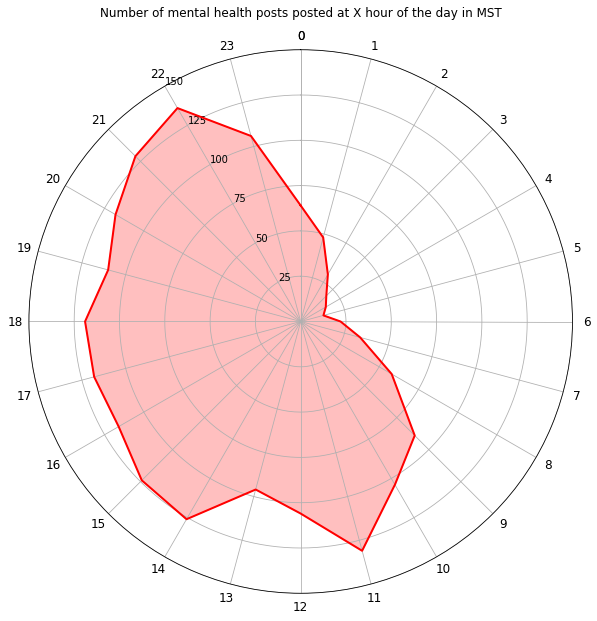

In [ ]:
fig3 = plt.figure(figsize=(10, 10))
ax = plt.subplot(polar=True)

ax.plot(angles, data3[0], 'r-', linewidth=2)
ax.fill(angles, data3[0], alpha=0.25, color='red')


ax.set_thetagrids(angles * 180/np.pi, hours, size=12)
ax.set_rticks([25, 50, 75, 100, 125, 150])
ax.set_rlabel_position(30)
ax.set_theta_offset(90 * np.pi / 180)

plt.title('Number of mental health posts posted at X hour of the day in MST')
plt.show()

## Number of mental health posts posted at an X day of the week


In [ ]:
data5 = np.zeros([1,8]) # 7 columns for 7 days of the week + 1 to complete the loop

In [ ]:
print(data5)

[[0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
post_count = 0
total_posts = len(mentalhealth_df)
for row in range(total_posts):
  post_count += 1 
  epoch = int(mentalhealth_df.loc[row, 'created_utc'])
  day_posted = time.gmtime(epoch).tm_wday

  if day_posted > 0:
    data5[0][day_posted - 1] += 1

  else:
    data5[0][6] +=1

In [ ]:
print(post_count)

2033


In [ ]:
print(data5)

[[304. 344. 323. 337. 221. 199. 305.   0.]]


In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
angles2 = np.linspace(0, 2*np.pi, len(days), endpoint=False)

In [ ]:
data5[0][6] = data5[0][0]

In [ ]:
angles2 = np.append(angles2, angles2[0])
days.append(days[0])

In [ ]:
data5 = np.flip(data5, axis=1)
days.reverse()

In [ ]:
print(data5)

[[  0. 304. 199. 221. 337. 323. 344. 304.]]


In [ ]:
print(angles2)

[0.         0.8975979  1.7951958  2.6927937  3.5903916  4.48798951
 5.38558741 0.        ]


/usr/local/lib/python3.7/dist-packages/matplotlib/projections/polar.py:729: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.array([[0.0, 0.0], [1.0, 1.0]], np.float),


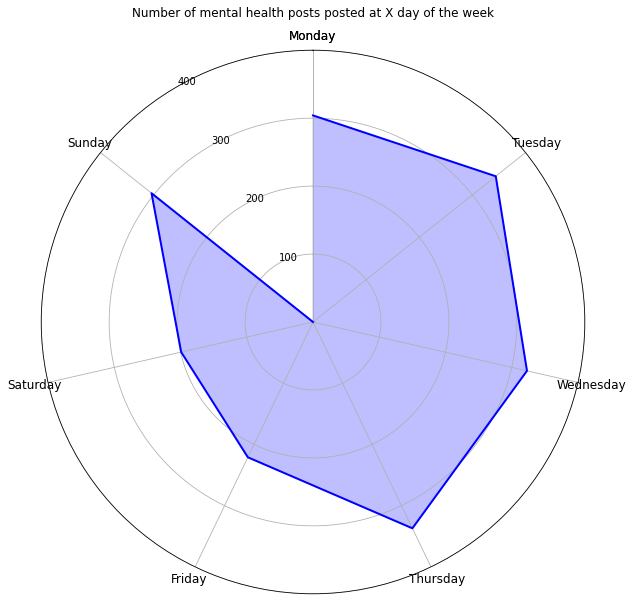

In [ ]:
fig4 = plt.figure(figsize=(10, 10))
ax = plt.subplot(polar=True)

ax.plot(angles2, data5[0], 'b-', linewidth=2)
ax.fill(angles2, data5[0], alpha=0.25, color='blue')


ax.set_thetagrids(angles2 * 180/np.pi, days, size=12)
ax.set_rticks([100, 200, 300, 400])
ax.set_rlabel_position(30)
ax.set_theta_offset(90 * np.pi / 180)

plt.title('Number of mental health posts posted at X day of the week')
plt.show()

## Number of mental health posts posted at an X day of the week at Y hour of the day



In [ ]:
data4 = np.zeros([7,24])

In [ ]:
hours = []
for hour in range(24):
  hours.append(hour)

In [ ]:
total_posts = len(mentalhealth_df)
post_count = 0
for row in range(total_posts):
  post_count += 1 
  epoch = int(mentalhealth_df.loc[row, 'created_utc'])
  day_posted = time.gmtime(epoch).tm_wday
  hour_posted = time.gmtime(epoch).tm_hour

  if hour_posted >= 7:
    hour_posted -= 7

  else:
    hour_posted = 24 + (hour_posted-7)

  if hour_posted < 7:
    if day_posted > 0:
      data4[day_posted-1][hour_posted] += 1
    else:
      data4[6][hour_posted] += 1
  else:
     data4[day_posted][hour_posted] += 1
  data4[day_posted][hour_posted] += 1

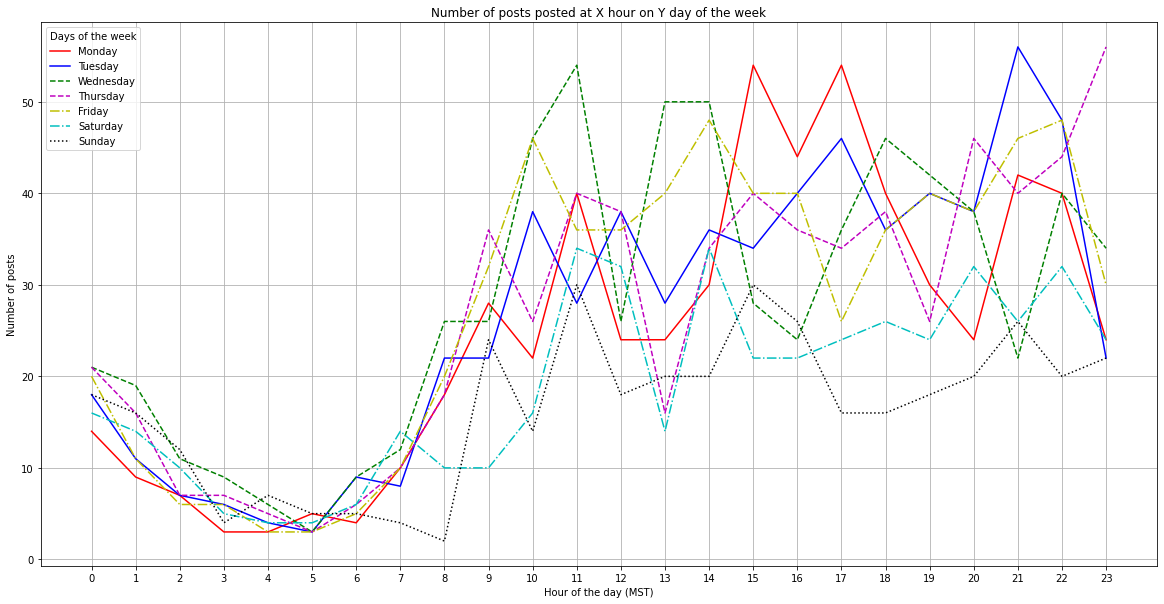

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
linestyle = ['-', '-', '--', '--', '-.', '-.', ':']
color = ['r', 'b', 'g', 'm', 'y', 'c', 'k']

for day in range(7):
    plt.plot(hours, data4[day], label=days[day], linestyle=linestyle[day], color=color[day])

plt.xlabel("Hour of the day (MST)")
plt.ylabel("Number of posts")
plt.xticks(np.arange(24))
plt.legend(title='Days of the week')
plt.grid()
plt.title('Number of posts posted at X hour on Y day of the week')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## Deleted Posts

## Topics in Mental Health Dataset

### Load the data

In [ ]:
model_posts = mentalhealth_df.preprocessed_post

In [ ]:
print(model_posts)

0       [happy, new, year, wish, happy, new, year, lea...
1                              [lonely, happy, new, year]
2                              [lonely, happy, new, year]
3       [deal, one, side, friendship, type, person, pu...
4       [escape, reality, sometimes, wan_na, say, fly,...
                              ...                        
2028    [mental_health, clinician, graduate, high, sch...
2029                         [make, friend, uni, curious]
2030    [experience, health, mental_health, service, c...
2031    [anyone, stat, note, terrible, stats, take, ne...
2032    [radiation, therapy, fall, anyone, else, radia...
Name: preprocessed_post, Length: 2033, dtype: object


### LDA Model

In [ ]:
dictionary = corpora.Dictionary(model_posts)

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in model_posts]

### Optimal number of topics

In [ ]:
coherence = []
for k in range(5,21):
  print('Round: ' + str(k))
  lda = gensim.models.ldamodel.LdaModel
  ldamodel = lda(doc_term_matrix, num_topics=k, id2word=dictionary, passes=40, iterations=200, chunksize=10000, eval_every=False)

  cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=model_posts, dictionary=dictionary, coherence='c_v')

  coherence.append((k, cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20


In [ ]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

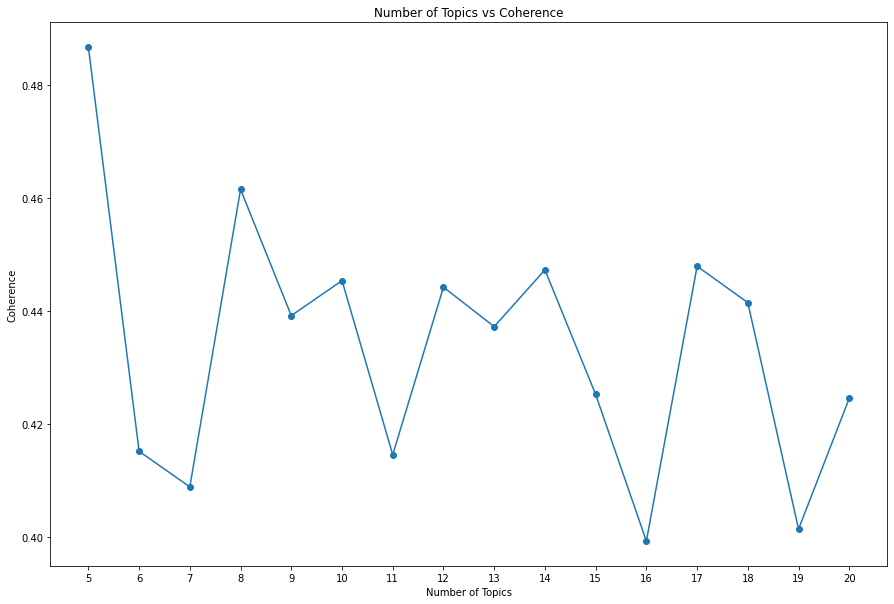

In [ ]:
plt.plot(x_val, y_val)
plt.scatter(x_val, y_val)
plt.title('Number of Topics vs Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [ ]:
print(x_val)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
print(y_val)

[0.4867210057632361, 0.4151355650584381, 0.4088434086120135, 0.4614995540461158, 0.4391522300541646, 0.44535272831695816, 0.4145317745992511, 0.44418679957705165, 0.4372092840679228, 0.4472532253515505, 0.4252063915773568, 0.3992421732089205, 0.44789525020914656, 0.44145310481577904, 0.40136037594988316, 0.42453754173074804]


In [ ]:
lda = gensim.models.ldamodel.LdaModel
ldamodel =lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=40, iterations=200, chunksize=10000, eval_every=None, random_state=0)

In [ ]:
ldamodel.show_topics(5, num_words=15, formatted=False)

[(0,
  [('get', 0.021692645),
   ('like', 0.013063952),
   ('feel', 0.012071657),
   ('year', 0.011366559),
   ('class', 0.011222293),
   ('know', 0.011047379),
   ('time', 0.010905875),
   ('take', 0.009559304),
   ('really', 0.008885473),
   ('want', 0.008275305),
   ('semester', 0.008065355),
   ('make', 0.0077333213),
   ('work', 0.007642716),
   ('would', 0.0073905187),
   ('even', 0.0073381905)]),
 (1,
  [('university', 0.013707135),
   ('tuition', 0.010849515),
   ('student', 0.008029677),
   ('pay', 0.0073594814),
   ('know', 0.0069981935),
   ('take', 0.0062463493),
   ('people', 0.0060761715),
   ('would', 0.0058568884),
   ('cost', 0.0051365816),
   ('need', 0.004873017),
   ('think', 0.004758698),
   ('cut', 0.004562907),
   ('get', 0.004068155),
   ('increase', 0.003919492),
   ('work', 0.0039191884)]),
 (2,
  [('course', 0.020225989),
   ('due', 0.009834066),
   ('student', 0.007595265),
   ('program', 0.0070994),
   ('budget_cut', 0.006878078),
   ('take', 0.006652871),


### Relevancy scores

In [ ]:
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


### Top terms according to relevancy score

In [ ]:
all_topics = {}
num_terms = 15
lambd = 0.1
for i in range(1,6): 
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [ ]:
topics = pd.DataFrame(all_topics).T

In [ ]:
topics[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Topic 1,get,semester,really,class,prof,job,stress,last,hard,bad,year,finish,work,situation,anyone
Topic 2,girl,friend,gym,friendship,meme,seasonal,wow,boyfriend,hang,jfe,qualtrics,lonely,partner,wtf,deviant
Topic 3,access_database_end,budget_cut,december,physic,stipulation,weekly,consolidate,chemistry,lab,memorize,attendance,encmp,abstract,creed,copy
Topic 4,service,www,sexual,counsel,centre,mec_e,resource,alberta,assault,intro,sorority,staff,chrtc,pac,vaccination
Topic 5,haruun,tuition,youtu,bike,roi,ucp,million,hike,government,depressant,oil,tax,disclose,ppl,cap


In [ ]:
topics.to_json('MentalHealthTopics.json', orient='columns')

## Concentration of CS specific posts in the Mental Health Dataset

In [ ]:
cs_lex = ['cs', 'computer science', 'comp sci', 'cmput', 'com sci', 'comp', 'computing science', 'computing', 'comput']

In [ ]:
cs_mentalhealth = pd.DataFrame(columns = ['id', 'author',	'author_flair_text', 'created_utc',	'num_comments',	'post', 'preprocessed_post'])

In [ ]:
print(cs_mentalhealth)

Empty DataFrame
Columns: [id, author, author_flair_text, created_utc, num_comments, post, preprocessed_post]
Index: []


In [ ]:
post_ids = list(mentalhealth_df['id'])

In [ ]:
len(post_ids)

2033

In [ ]:
print(post_ids)

['abd016', 'abg60z', 'abg611', 'acbkhk', 'acf0h6', 'acmk87', 'ad0pl1', 'adpfji', 'adwtvf', 'ae188y', 'aefiyf', 'aefrf0', 'aeg4vw', 'aesx6e', 'afqjtr', 'ag5qld', 'ahpjir', 'ahv6ro', 'ai6x91', 'ai92o7', 'aipbue', 'ajdz4l', 'ajswiq', 'ajt9l2', 'aka0iq', 'akgkd2', 'akhxqh', 'akopo7', 'akvfdh', 'al113l', 'al9f2n', 'alakl2', 'almfe2', 'alwejp', 'am4ii7', 'ambe5y', 'amoxfu', 'amsk5z', 'an2wd0', 'an828c', 'anh4p6', 'anu28r', 'ao13ps', 'ao6qsf', 'aoae49', 'aocp9h', 'aoogrv', 'aoyvwd', 'ap1x6c', 'apb31q', 'apduyx', 'ape5uu', 'apegl4', 'apknuw', 'apq0xn', 'apwz6t', 'aq80c5', 'aqayjn', 'aqlkcw', 'aqmf7f', 'arfwbr', 'arr7uh', 'as3v00', 'ashyxb', 'atrgt2', 'au73h7', 'auaftz', 'auc6lm', 'aufl34', 'auo54x', 'aup267', 'auqkj4', 'autb0r', 'autw2e', 'av24i7', 'av73tf', 'avlq72', 'avlqc4', 'avmidg', 'avo4m4', 'avsqd3', 'avyumg', 'awodtb', 'awra5d', 'ax0hy0', 'ax0ipv', 'axhvpp', 'axslw8', 'ay887c', 'ayjy0e', 'ayz30f', 'az6e4v', 'azmbg6', 'azp1go', 'b01pxj', 'b0exnv', 'b0p43m', 'b0vpzt', 'b1vp7c', 'b1xrkn',

In [ ]:
for i in range(len(post_ids)):
  post = mentalhealth_df.loc[i, 'post'].lower().split()
  flair = mentalhealth_df.loc[i, 'author_flair_text']
  if flair is not None:
    flair = flair.lower().split()
    for x in cs_lex:
      if x in flair:
        cs_mentalhealth = cs_mentalhealth.append(mentalhealth_df.iloc[i])
        break
      elif x in post:
        cs_mentalhealth = cs_mentalhealth.append(mentalhealth_df.iloc[i])
        break
  else:
    for x in cs_lex:
      if x in post:
        cs_mentalhealth = cs_mentalhealth.append(mentalhealth_df.iloc[i])
        break

In [ ]:
len(cs_mentalhealth)

44

In [ ]:
cs_mentalhealth = cs_mentalhealth.reset_index(drop=True)

In [ ]:
cs_mentalhealth[:30]

,id,author,author_flair_text,created_utc,num_comments,post,preprocessed_post
0,auaftz,goobyandscooby,None,1551030836,26,You don't have to have all the answers right n...,"[answer, right, life, define, right, never, kn..."
1,azmbg6,random_brownboy,None,1552262430,6,Advice Needed!!!. So I'm an international stud...,"[advice, need, international, student, move, e..."
2,bgpzvf,Rmnattas,CS Honors,1556077911,0,I would keep you in a register close to my hea...,"[would, keep, register, close, heart, bit, hea..."
3,bgq73y,Rmnattas,CS Honors,1556079277,1,I would keep you in a register close to me ......,"[would, keep, register, close, bit, heart, giv..."
4,cz0w4r,xinyuchen98,Computing Science Specialization in Software P...,1567490647,0,Advice needed about buying a bike. I am consid...,"[advice, need, buying, bike, consider, buy, bi..."
5,d04p5b,Necropolictic,5th year Computing Science,1567708038,2,CAB Renovation: The Elimination of Plugins. li...,"[cab, renovation, elimination, plugins, like, ..."
6,dg9qeq,lyrical_liar,cmput + psych,1570766753,11,Im so confused. About life. And I hate that I ...,"[confuse, life, hate, complain, cause, really,..."
7,dpbghk,honestpretzels,Computing Science,1572463616,16,Alberta Budget Summary. Now that the UCP bud...,"[alberta, budget, summary, ucp, budget, thing,..."
8,e23zqk,justarandomcsstudent,Comp Sci:snoo_dealwithit:,1574800330,2,Tired. Final week is only two weeks away and I...,"[tire, final, week, two, week, away, start, lo..."
9,e43h9w,woinf,cs spec,1575147999,33,Top 10 reasons why this semester has been awes...,"[top, reason, semester, awesome]"


In [ ]:
cs_mentalhealth.to_json("CSMentalHealth.json", orient="columns")

## Mental Health Resources Analyzation

In [ ]:
services_lex = ['ccs', 'clinical counseling services', 'mental health services', 'healthcare', 'counselor', 'mental health resources']

In [ ]:
mentalhealth_resources = pd.DataFrame(columns = ['id', 'author',	'author_flair_text', 'created_utc',	'num_comments',	'post', 'preprocessed_post'])

In [ ]:
post_ids = list(mentalhealth_df['id'])

In [ ]:
len(post_ids)

2033

In [ ]:
print(post_ids)

['abd016', 'abg60z', 'abg611', 'acbkhk', 'acf0h6', 'acmk87', 'ad0pl1', 'adpfji', 'adwtvf', 'ae188y', 'aefiyf', 'aefrf0', 'aeg4vw', 'aesx6e', 'afqjtr', 'ag5qld', 'ahpjir', 'ahv6ro', 'ai6x91', 'ai92o7', 'aipbue', 'ajdz4l', 'ajswiq', 'ajt9l2', 'aka0iq', 'akgkd2', 'akhxqh', 'akopo7', 'akvfdh', 'al113l', 'al9f2n', 'alakl2', 'almfe2', 'alwejp', 'am4ii7', 'ambe5y', 'amoxfu', 'amsk5z', 'an2wd0', 'an828c', 'anh4p6', 'anu28r', 'ao13ps', 'ao6qsf', 'aoae49', 'aocp9h', 'aoogrv', 'aoyvwd', 'ap1x6c', 'apb31q', 'apduyx', 'ape5uu', 'apegl4', 'apknuw', 'apq0xn', 'apwz6t', 'aq80c5', 'aqayjn', 'aqlkcw', 'aqmf7f', 'arfwbr', 'arr7uh', 'as3v00', 'ashyxb', 'atrgt2', 'au73h7', 'auaftz', 'auc6lm', 'aufl34', 'auo54x', 'aup267', 'auqkj4', 'autb0r', 'autw2e', 'av24i7', 'av73tf', 'avlq72', 'avlqc4', 'avmidg', 'avo4m4', 'avsqd3', 'avyumg', 'awodtb', 'awra5d', 'ax0hy0', 'ax0ipv', 'axhvpp', 'axslw8', 'ay887c', 'ayjy0e', 'ayz30f', 'az6e4v', 'azmbg6', 'azp1go', 'b01pxj', 'b0exnv', 'b0p43m', 'b0vpzt', 'b1vp7c', 'b1xrkn',

In [ ]:
for i in range(len(post_ids)):
  post = mentalhealth_df.loc[i, 'post'].lower().split()
  for x in services_lex:
    if x in post:
      mentalhealth_resources = mentalhealth_resources.append(mentalhealth_df.iloc[i])
      break

In [ ]:
len(mentalhealth_resources)

17

In [ ]:
mentalhealth_resources = mentalhealth_resources.reset_index(drop=True)

In [ ]:
mentalhealth_resources[:17]

,id,author,author_flair_text,created_utc,num_comments,post,preprocessed_post
0,bkccdp,CCSthrowaway1,None,1556911220,6,Some receptionists and the Counselling and Cli...,"[receptionist, counsel, clinical, service, dem..."
1,bm1igt,CCSthrowaway1,None,1557294253,2,UPDATE: I went to my CCS appointment and the i...,"[update, ccs, appointment, intake, nurse, awes..."
2,dskksi,aloeffales,None,1573065633,9,therapist so i dont drop out. I really think I...,"[therapist, dont, drop, really, think, need, s..."
3,dwxaxp,RatherShrektastic,None,1573853691,2,How does one go about getting medication for a...,"[one, get, medication, anxiety, psychiatric, p..."
4,fpkbxv,di3e8ej3,None,1585258962,8,Why GFC Debate Matters- Educate Yourself First...,"[gfc, debate, matter, educate, first, universi..."
5,juuyb3,[deleted],None,1605479264,4,hi I am your fellow international student faci...,"[fellow, international, student, face, emotion..."
6,jvz2hv,Ihateithere1798,None,1605639881,72,"Depression - Cipralex?. Hello, sorry for posti...","[depression, cipralex, hello, sorry, post, rea..."
7,lc2c5e,whoknowshank,Likes Science,1612397196,26,"Undergrad SpringCourses Available. Hi all, her...","[undergrad, springcourses, available, summary,..."
8,mgzdyt,m_kim99,None,1617170193,11,I feel my eyesight deteriorating.... Staring a...,"[feel, eyesight, deteriorate, star, computer, ..."
9,owp6tu,EightBitRanger,Alberta School of Business,1627942273,1,Open letter: Request for mandatory vaccination...,"[open, letter, request, mandatory, vaccination..."


### Sentiment Analysis

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
neg = []
pos = []
neu = []
for i in range(len(mentalhealth_resources)):
  post = mentalhealth_resources.loc[i, 'post']
  sentiment_dict = analyzer.polarity_scores(post)
  neg.append(sentiment_dict['neg']*100)
  pos.append(sentiment_dict['pos']*100)
  neu.append(sentiment_dict['neu']*100)

In [ ]:
mentalhealth_resources['Positive'] = pos
mentalhealth_resources['Negative'] = neg
mentalhealth_resources['Neutral'] = neu

In [ ]:
mentalhealth_resources[:17]

,id,author,author_flair_text,created_utc,num_comments,post,preprocessed_post,Positive,Negative,Neutral
0,bkccdp,CCSthrowaway1,None,1556911220,6,Some receptionists and the Counselling and Cli...,"[receptionist, counsel, clinical, service, dem...",9.5,16.7,73.8
1,bm1igt,CCSthrowaway1,None,1557294253,2,UPDATE: I went to my CCS appointment and the i...,"[update, ccs, appointment, intake, nurse, awes...",14.2,8.9,76.8
2,dskksi,aloeffales,None,1573065633,9,therapist so i dont drop out. I really think I...,"[therapist, dont, drop, really, think, need, s...",10.1,12.6,77.3
3,dwxaxp,RatherShrektastic,None,1573853691,2,How does one go about getting medication for a...,"[one, get, medication, anxiety, psychiatric, p...",5.4,19.9,74.7
4,fpkbxv,di3e8ej3,None,1585258962,8,Why GFC Debate Matters- Educate Yourself First...,"[gfc, debate, matter, educate, first, universi...",5.7,8.5,85.8
5,juuyb3,[deleted],None,1605479264,4,hi I am your fellow international student faci...,"[fellow, international, student, face, emotion...",16.6,12.4,71.0
6,jvz2hv,Ihateithere1798,None,1605639881,72,"Depression - Cipralex?. Hello, sorry for posti...","[depression, cipralex, hello, sorry, post, rea...",9.9,15.6,74.5
7,lc2c5e,whoknowshank,Likes Science,1612397196,26,"Undergrad SpringCourses Available. Hi all, her...","[undergrad, springcourses, available, summary,...",3.4,2.6,94.0
8,mgzdyt,m_kim99,None,1617170193,11,I feel my eyesight deteriorating.... Staring a...,"[feel, eyesight, deteriorate, star, computer, ...",4.0,8.9,87.1
9,owp6tu,EightBitRanger,Alberta School of Business,1627942273,1,Open letter: Request for mandatory vaccination...,"[open, letter, request, mandatory, vaccination...",8.9,7.8,83.3


In [ ]:
mentalhealth_resources.to_json("MentalHealthResources.json", orient="columns")